<a href="https://colab.research.google.com/github/naufalihsan/tesseract/blob/master/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Optical Character Recognition Using Tesseract

### Contributor
- Naufal Ihsan Pratama

In [0]:
!sudo apt install tesseract-ocr
!pip install pytesseract

#### Import Library

In [0]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [156]:
from google.colab import files
uploaded = files.upload()

Saving sim_example3.jpeg to sim_example3.jpeg


### Checking Image Quality

In [0]:
import cv2
import imutils
import numpy as np

from google.colab.patches import cv2_imshow

In [0]:
from pytesseract import Output

def detect_text(photo):
  print(pytesseract.image_to_string(photo))
  d = pytesseract.image_to_data(photo, output_type=Output.DICT)
  n_boxes = len(d['text'])
  for i in range(n_boxes):
      if int(d['conf'][i]) > 60:
          (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
          out = cv2.rectangle(photo, (x, y), (x + w, y + h), (0, 0, 255), 2)
  
  cv2_imshow(out)

Enam belas digit angka ini merupakan kode yang dapat dijabarkan, dan memiliki arti sebagai berikut:

pp : 2 digit awal merupakan kode provinsi</br>
kk : 2 digit kedua merupakan kode kabupaten atau kotamadya</br>
cc : 2 digit ketiga merupakan kode kecamatan</br>
dd : 2 digit keempat merupakan tanggal lahir</br>
mm : 2 digit kelima merupakan bulan lahir</br>
yy : 2 digit keenam merupakan tahun lahir</br>
9999 : 4 digit terakhir merupakan nomor register kependudukan</br>


### Reading KTP

In [132]:
green = np.uint8([[[127,127,127 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print( hsv_green )

[[[  0   0 127]]]


In [0]:
from pytesseract import Output

def extract_ktp(file_path):
  image = cv2.imread(file_path)
  scale_percent = 120
  width = int(image.shape[1] * scale_percent / 100)
  height = int(image.shape[0] * scale_percent / 100)
  dim = (width, height)
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_CUBIC)
  grayscale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(grayscale, (3,3), 0)
  _, threshold = cv2.threshold(
      blurred, 127, 255, cv2.THRESH_OTSU)
  kernel = np.ones((2, 2), np.uint8)
  morph = cv2.morphologyEx(threshold, cv2.MORPH_HITMISS, kernel)
  th = cv2.adaptiveThreshold(morph, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
  return th

def img_cnts(file_path):
  image = cv2.imread(file_path,1)
  # scale_percent = 100
  # width = int(image.shape[1] * scale_percent / 100)
  # height = int(image.shape[0] * scale_percent / 100)
  # dim = (width, height)
  # resized = cv2.resize(image, dim, interpolation = cv2.INTER_CUBIC)
  # grayscale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
  # blurred = cv2.GaussianBlur(grayscale, (25,25), 0)
  # _, threshold = cv2.threshold(
  #     blurred, 127, 255, cv2.THRESH_BINARY)

  # ALTERNATIVE
  # hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  # lower_blue=np.array([90,70,70])
  # upper_blue=np.array([110,255,255])
  # mask = cv2.inRange(hsv, lower_blue, upper_blue) 
  # erode=cv2.erode(mask,None,iterations=1)
  # dilate=cv2.dilate(erode,None,iterations=1)

  #ALT2
  # blurred = cv2.GaussianBlur(image, (3, 3), 0)
  # dst = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 3)
  dst = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
  # gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
  # blurred = cv2.GaussianBlur(gray, (5,5), 1000)
  # _, threshold = cv2.threshold(
  #     blurred, 127, 255, cv2.THRESH_TRUNC)
  gray=cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)
  blurred = cv2.GaussianBlur(gray, (5,5), 0)
  _, threshold = cv2.threshold(
      blurred, 127, 255, cv2.THRESH_BINARY)
  # cv2_imshow(hsv)
  # lower_blue=np.array([0,70,70])
  # upper_blue=np.array([255,255,255])
  # green_mask = cv2.inRange(hsv, (36, 0, 0), (70, 255,255))
  # mask = cv2.inRange(hsv, lower_blue, upper_blue)
  # mask = cv2.bitwise_or(mask, green_mask) 
  # erode=cv2.erode(mask,None,iterations=1)
  # dilate=cv2.dilate(erode,None,iterations=1)
  # _, threshold = cv2.threshold(
  #     dst, 0, 255, cv2.THRESH_TRUNC+cv2.THRESH_OTSU)

  return threshold

PROVINS! ACEH
KABUPATEN ACEH UTARA

HIK 13408023301810003

Nama *MJHAMM?s D FAZ vo

TempaUTgi Lahr : BANGKA JAYA, 3101 1381

Jeris Kelarin : LAKI-LAKI Gul Darah A

Alamat . DUSUN UTEUN KUBU BARAT
RURW rede
KelDesa : UTEUN GEULINGGANG
Kecamatan :DEWANTARA

Agama HSLAM we,
Status Perkewinon: KAWIN .*"*.-.
Pekerjaan 2
Kewarganegara:
Berlaku Hingga


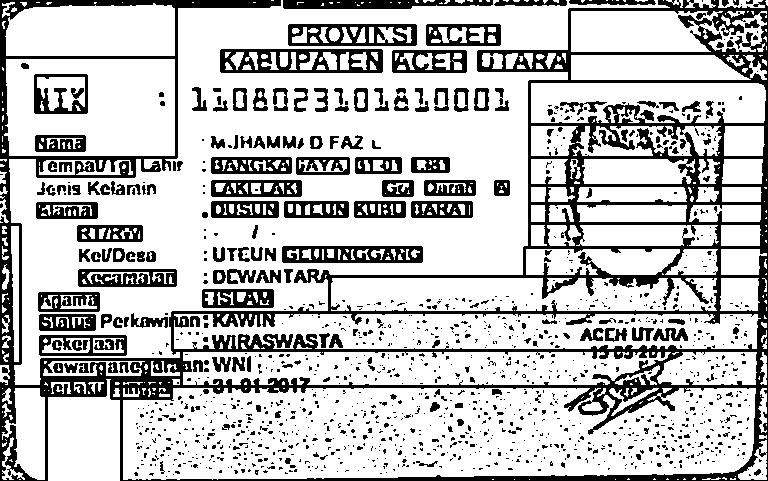

In [0]:
# ktp = extract_ktp('KTP_Bahy.jpg')
ktp = extract_ktp('ktp_example7.jpeg')
# ktp = extract_ktp('ktp_example.jpeg')
detect_text(ktp)

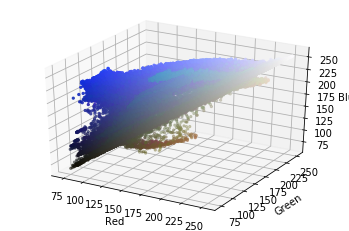

In [158]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

nemo = cv2.imread('sim_example3.jpeg')
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

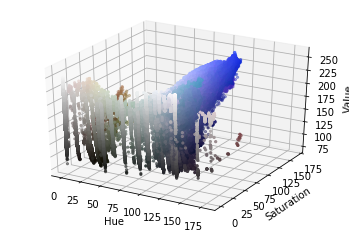

In [159]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

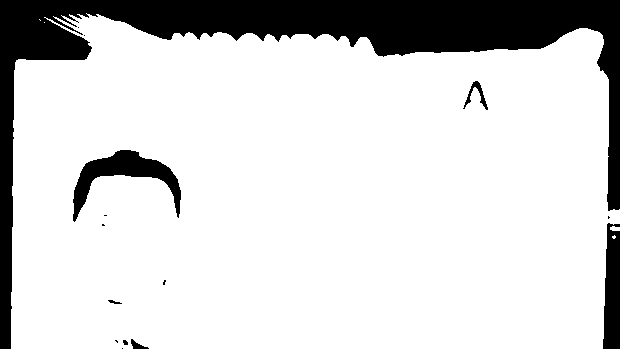

In [223]:
import math
# 'ktp_example7.jpeg'
# 'ktp-test.jpeg'
im = cv2.imread('sim_example3.jpeg')
ktp = img_cnts('sim_example3.jpeg')
# ktp = img_cnts('ktp_example7.jpeg')
contours, _ = cv2.findContours(ktp,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2_imshow(ktp)

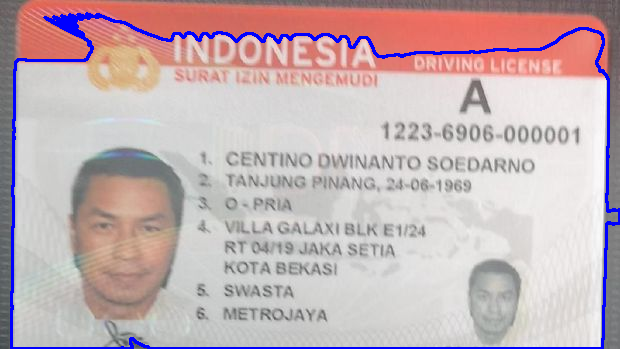

In [224]:
# Sort the contours 
contours = sorted(contours, key = cv2.contourArea, reverse = True)

img_copy = im.copy()

new = []
for c in contours:
  peri = cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, 0.04 * peri, True)
  if len(approx) == 4:
    (x, y, w, h) = cv2.boundingRect(approx)
    ar = w / float(h)
    if ar > 1 and ar < 2:
      new.append(c)
      roi = img_copy[y:y + h, x:x + w]

final = cv2.drawContours(img_copy,new,-1,255,2)
cv2_imshow(final)

PROVINSI ACEH
i KABUPATEN ACEH UTARA

NIK + 41080231014810001 a

   
 
     
  

Nama : MJHAMMé D FAZIL

Tempat/Tgi Lahir : BANGKA JAYA, 31-01-1981

Jenis Kelamin : LAKI-LAKI Gol. Darah: A
Alamat

» DUSUN UTEUN KUBU BARAT
RT/RW sa4, «
: UTEUN GEULINGGANG


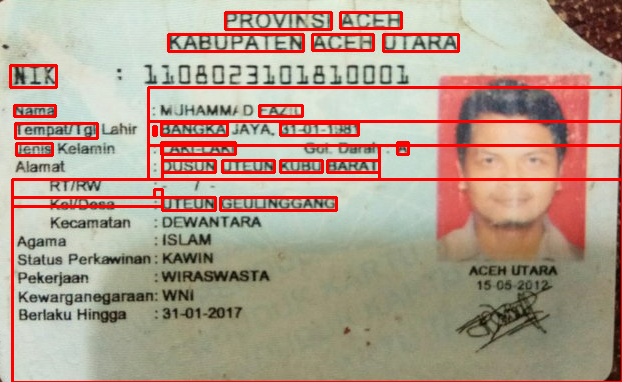

In [0]:
detect_text(im)